# Project Requirements

## Modules & Helper Functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# @title
# Hidden
###

# Helper function to annotate a single point
def annotate_pt(text, xy, xytext, color):
  plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
  plt.annotate(text,xy=xy,xytext=xytext,
                # color=color,
                arrowprops=dict(arrowstyle="->",
                color = color,
                connectionstyle='arc3'))


# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts, f_val, vmin=None, vmax=None):
  if vmin == None:
    vmin = min(f_val)
  if vmax == None:
    vmax = max(f_val)

  f_plot = plt.scatter(pts[:,0],pts[:,1],
                        c=f_val,vmin=vmin,vmax=vmax,
                        cmap='RdBu_r')
  plt.colorbar(f_plot)
  # Show the optimal point
  #annotate_pt('global minimum',(0,0),(-5,-7),'yellow')


# Generates 2500 equally spaced points on a grid, and
# Computes the function value at each point
def visualize_fw(f, x_ran, y_ran):
  xcoord = np.linspace(x_ran[0], x_ran[1], 50)
  ycoord = np.linspace(y_ran[0], y_ran[1], 50)
  w1, w2 = np.meshgrid(xcoord, ycoord)
  pts = np.vstack( (w1.flatten(), w2.flatten()) )

  # All 2D points on the grid
  pts = pts.transpose()

  # Function value at each point
  f_vals = np.apply_along_axis( f, axis=1, arr=pts )

  # function is x^2
  #f_vals = np.sum(pts*pts, axis=1)
  #return f_vals
  function_plot(pts, f_vals)
  #plt.title('Objective Function Shown in Color')
  plt.show()
  return pts, f_vals


# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
def visualize_learning(pts, f_vals, w_history):

  # Make the function plot
  function_plot(pts, f_vals)

  # Plot the history
  plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta')

  # Annotate the point found at last iteration
  annotate_pt('Last Position',
              (w_history[-1,0],w_history[-1,1]),
              (-1,7),'green')
  iter = w_history.shape[0]
  for w,i in zip(w_history,range(iter-1)):
    # Annotate with arrows to show history
    plt.annotate("",
                xy=w, xycoords='data',
                xytext=w_history[i+1,:], textcoords='data',
                arrowprops=dict(arrowstyle='<-',
                        connectionstyle='angle3'))

In [ ]:
def scatterFeatureError(X, Y, Z):
  cmap = sns.cubehelix_palette(as_cmap=True)
  f, ax = plt.subplots()
  points = ax.scatter(X, Y, c=Z, s=50, cmap=cmap)
  f.colorbar(points)

## Main

**Objective & Gradient Functions**

In [ ]:
# Objective function
def f(w):
  return np.sum(w*w)
  #return w[0]**2 + w[1]**2

# Function to compute the gradient
def grad(w):
  return 2*w
  # np.array([ 2*w[0],  2*w[1])

**Plotting a Function**

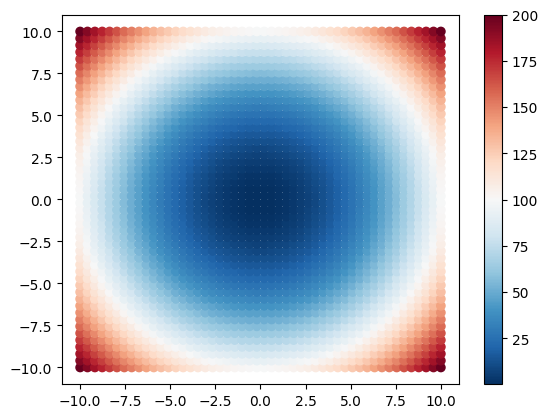

In [ ]:
# plots function values by color bar, on [-10, 10] for x axis and [-10, 10] for y axis
# returns points and function values
pts, f_vals = visualize_fw(f, [-10, 10], [-10, 10])

**Gradient Descent Algorithm**

In [ ]:
# input: max_iterations  Iterations number
#        threshold       Stepping threshold
#        w_init          Initial position
#        obj_func        Objective function
#        grad_func       Gradient function
#        learning_rate   Learning rate
#        momentum        Momentum
# output:
def gradient_descent(max_iterations, threshold, w_init,
                     obj_func, grad_func,
                     learning_rate = 0.05, momentum = 0.8):

  # initialize position at w_init
  w = w_init
  # history of positions is only w
  w_history = w
  # history of objective function positions is only obj_func(w)
  f_history = obj_func(w)
  # initialize learned step to zero
  delta_w = np.zeros(w.shape)
  # initialize iteration counter
  iter_cou = 0
  # the difference between last two successive values of the objective function
  diff = 1.0e10

  # learn until maximum iterations is passed, or
  # the difference between objective function values is below the threshold
  while  iter_cou < max_iterations and diff > threshold:

    # compute the difference between current position and new learned position by the gradient
    # momentum to step by previous gradients, even when current gradient is low
    delta_w = ( -learning_rate * grad_func(w) ) + (momentum * delta_w)
    # step to the new position by the computed difference, i.e delta
    w = w + delta_w

    # store the history of w (positions) and f (objective function values)
    w_history = np.vstack( (w_history, w) )
    f_history = np.vstack( (f_history, obj_func(w)) )

    # increment iteration number
    iter_cou += 1
    # compute the diff between last two successive values of the objective function
    diff = np.absolute( f_history[-1] - f_history[-2])

  return w_history, f_history

**Solve**

In [ ]:
def solve_fw(w_init, learning_rate, momentum):

  # compute gradient sequence
  # positions, and function values
  w_history, f_history = gradient_descent(5, -1, w_init, f, grad, learning_rate, momentum)

  # Plot
  visualize_learning(pts, f_vals, w_history)
  plt.text(-5, 12,'Learning Rate = '+str(learning_rate), fontsize=13)
  plt.text(-4, -14,'momentum = ' + str(momentum), fontsize=13)
  plt.show()

  return w_history[-1], f_history[-1]

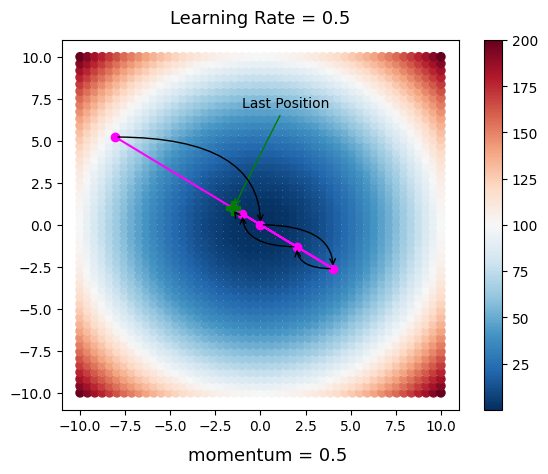

In [ ]:
# learning parameters
rand = np.random.RandomState(19)
w_init = rand.uniform(-10, 10, 2)
learning_rate = 0.5
momentum = 0.5

# plot learning steps
# get optimal position and optimal function value
opt_w, opt_f = solve_fw(w_init, learning_rate, momentum)

In [ ]:
# position of optimal solution
opt_w

array([-1.50924899,  0.97968644])

In [ ]:
# function value of optimal solution
opt_f

array([3.23761804])

## Bonus Code

In [ ]:
def solve_fw():
  # Setting up
  rand = np.random.RandomState(19)
  w_init = rand.uniform(-10,10,2)
  fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
  learning_rates = [0.05,0.2,0.5,0.8]
  momentum = [0,0.5,0.9]
  ind = 1

  # Iteration through all possible parameter combinations
  for alpha in momentum:
    for eta,col in zip(learning_rates,[0,1,2,3]):
      plt.subplot(3,4,ind)
      w_history,f_history = gradient_descent(5,-1,w_init, f, grad, eta, alpha)

      visualize_learning(pts, f_vals, w_history)
      ind = ind+1
      plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
      if col==1:
        plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

  fig.subplots_adjust(hspace=0.5, wspace=.3)
  plt.show()

<ipython-input-15-a4d731c2e0ba>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,ind)


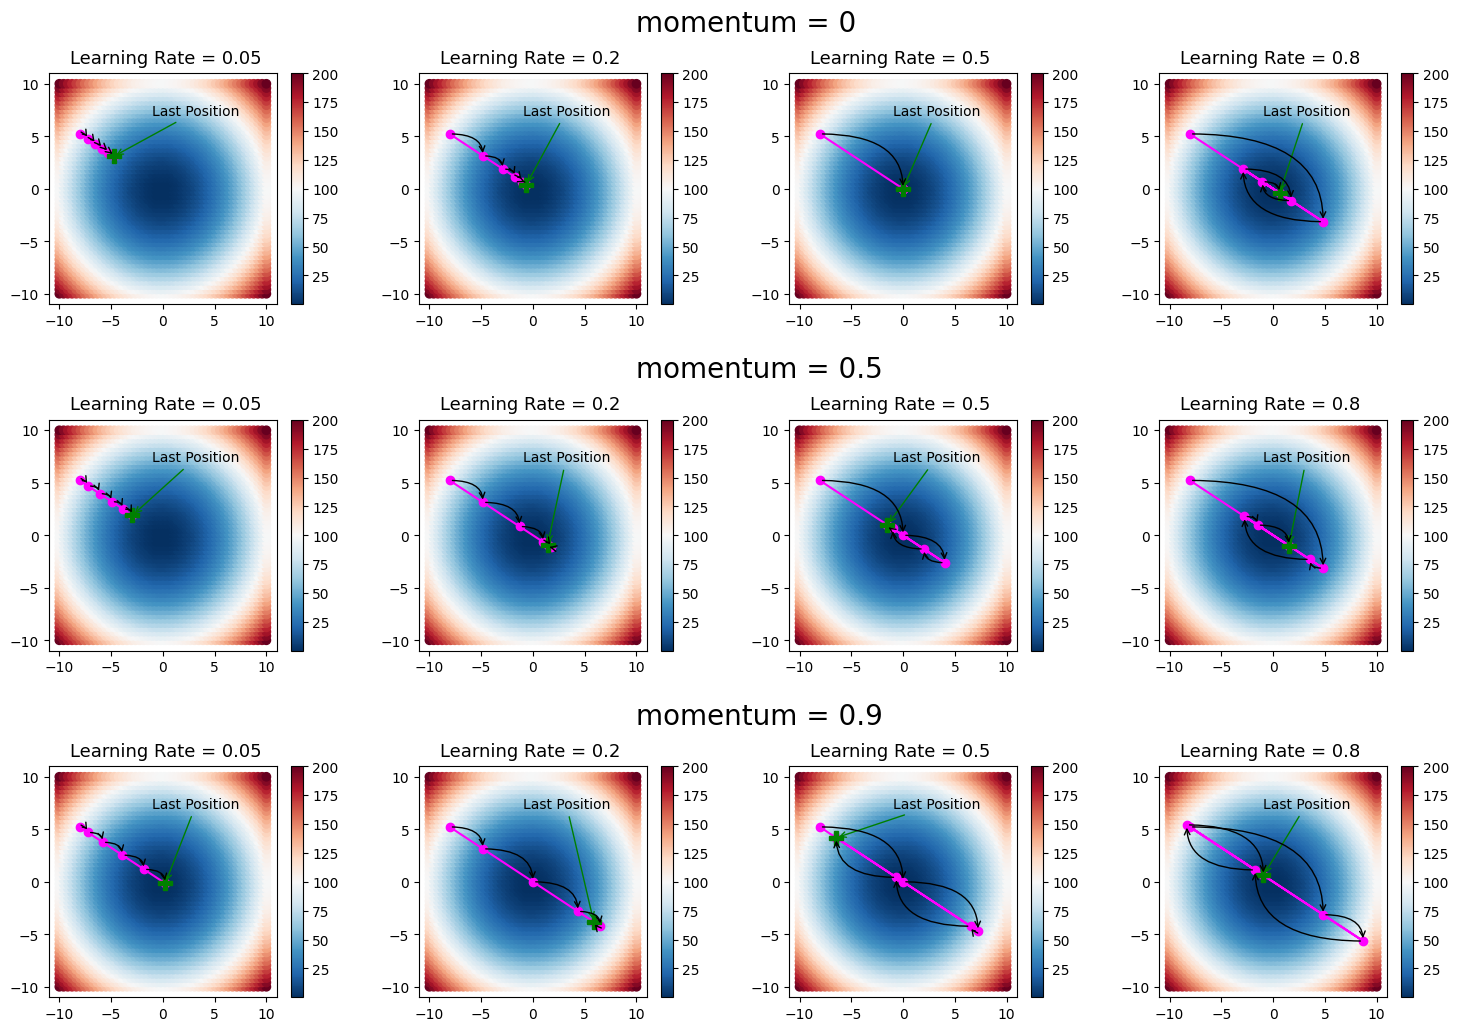

In [ ]:
solve_fw()

## Deliverables

- Read about the formulation of linear programming from [here](https://byjus.com/maths/linear-programming/)
- Experiment on various functions families, and learning parameters (iteration number, learning rate, momentum, ..etc). Analyse:
  - The existince of a global max/min in the function
  - Algorithm's finding of global/local max/min
- Interpret and correlate findings with function's behaviour and input parameters.
- Formulate guidelines for deciding learning parameters given a function with some behavioural properties

# Guidance

## Business, Real-data, Predictive Models

### Prediction Business

- Banks' loans default.
- Platform's users churn for maintaining retention.
- Students failure for additional assistance.
- Potential clients for targeted campains.
- Health-care diagnosis.

### Real-data ([Source](https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023))

Create a shortcut of "Spring 2024 - Math with Applications" in drive

`Spring 2024 - Math with Applications -> Right Click -> Organize -> Create a Shortcut`

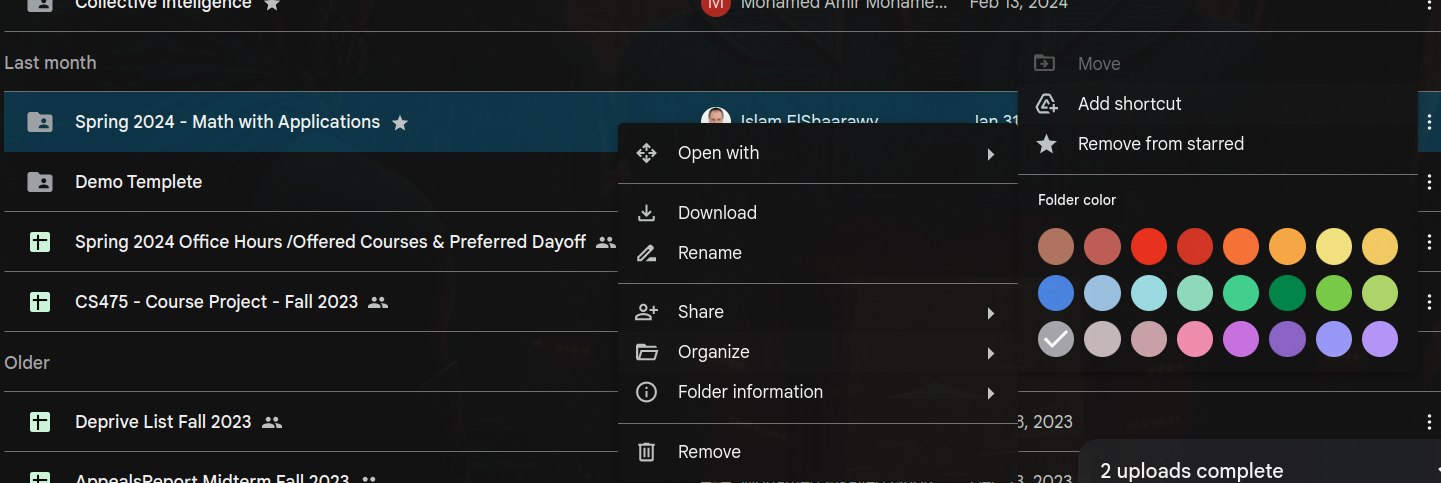

In [ ]:
# mount the drive content to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Copy the path of the dataset

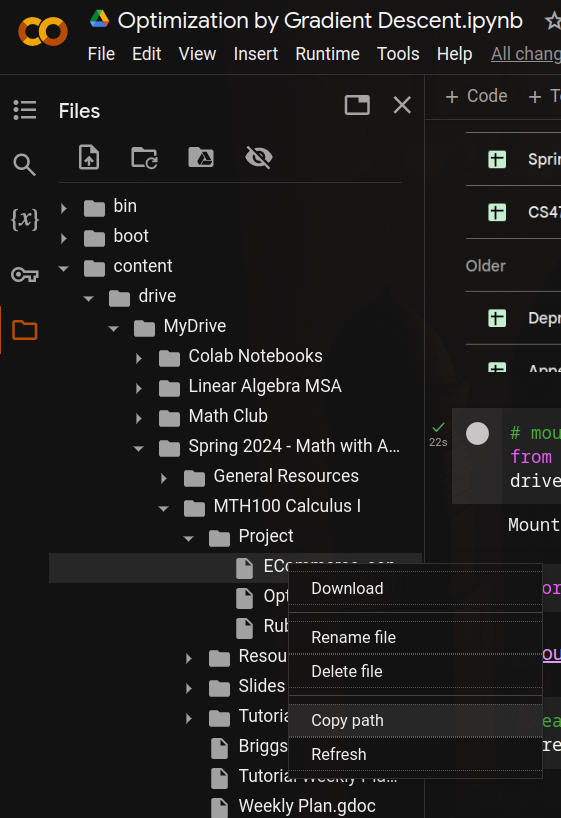

In [ ]:
import pandas as pd

**Supermarket** ([Source](https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023))

In [ ]:
pd.read_csv("/content/drive/MyDrive/Spring 2024 - Math with Applications/MTH102 Calculus II/Project/ECommerce_consumer_behaviour.csv")

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                           NaN          17                  1          0   
1                           NaN          91                  2          0   
2                           NaN          36                  3          0   
3                           NaN          83                  4          0   
4                           NaN          83                  5          0   
...                         ...         ...                ...        ...   
2019496                     5.0          83                  8          0   
2019497                     3.0         115                  1          1   
2019498                     3.0          32                  2          1   
2019499                     3.0          32                  3          1   
2019500                     3.0         123                  4          1   

         department_id  department                   product_name  
0                   13      pantry             baking ingredients  
1                   16  dairy eggs                soy lactosefree  
2                   16  dairy eggs                         butter  
3                    4     produce               fresh vegetables  
4                    4     produce               fresh vegetables  
...                ...         ...                            ...  
2019496              4     produce               fresh vegetables  
2019497              7   beverages  water seltzer sparkling water  
2019498              4     produce               packaged produce  
2019499              4     produce               packaged produce  
2019500              4     produce     packaged vegetables fruits  

[2019501 rows x 12 columns]

### Calculus Modeling by a Multi-variable Function

Predict a customer's order value by both the hour of order and inflation rate.

- $y$ = customer's order value.
- $x_0$ = order hour of the day.
- $x_1$ = inflation rate.
- $b$ = expected minimum.

Design
- Customers buy at least 100 LE.
- 100x the inflation rate is added to the minimum
- If a customer purchases 9:00 AM, Then she buy the minimum.
- Each one hour after 9:00 AM, Increases expected total value by 5 LE.

\begin{align}
f(x) &= 5(x_0-9) + 100x_1 + 100 \\
&= 5x_0 - 45 + 100x_1 + 100 \\
&= 5x_0 + 100x_1 + 55
\end{align}



In [ ]:
# input
## x_0. integer
## x_1. integer
def predictValue_hourInflation(x0, x1):
  return (5*x0) + (100*x1) + 55

Given a customer who purchased an order at 20:00 PM with inflation rate 0.5, We predict his total purchase value is 205 LE.

In [ ]:
predictValue_hourInflation(20, 0.5)

205.0

In [ ]:
# input
## x. array, x[0] is x_0 and x[1] is x_1
def predictValue_hourInflation(x):
  return (5*x[0]) + (100*x[1]) + 55
  # alternative with numpy
  #return np.sum(np.array([5, 100]) * x) + 55

Visualizing the function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

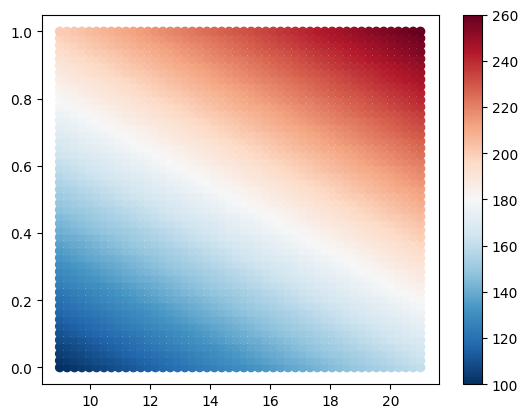

In [ ]:
# order hour on 9:00 AM ~ 21:00 PM, and inflation rate on 0 ~ 1
pts, f_vals = visualize_fw(predictValue_hourInflation, [9, 21], [0, 1])
# pts are the points
# f_vals are function values on the points

In [ ]:
# read data as a numpy array
actual = pd.read_csv("/content/drive/MyDrive/Spring 2024 - Math with Applications/MTH102 Calculus II/Project/customer_order_hour_infRate.csv")['0'].to_numpy()
actual

array([ 58.2347914 ,  51.71505222,  53.77554535, ..., 208.28581007,
       216.30048552, 218.88508916])

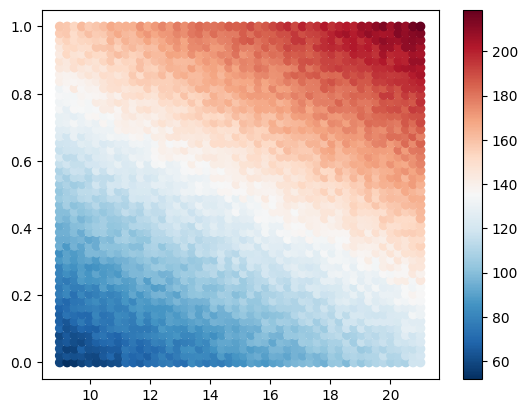

In [ ]:
# visualize it
function_plot(pts, np.array(actual) )

It seems our model won't be predictive. Our project is to find parameters which fit the data.

### Task

- Explore Kaggle datasets, and remark the relation between data and the practical application.
- Construct a predictive model as a function by arbitrary parameters.
- Visualize it.

## Error as a function and plot

### Error Function

Error at a point

In [ ]:
actual

array([ 58.2347914 ,  51.71505222,  53.77554535, ..., 208.28581007,
       216.30048552, 218.88508916])

In [ ]:
predictions = [ predictValue_hourInflation(i) for i in pts ]

In [ ]:
actual[0] - predictions[0]

-41.76520860020959

In [ ]:
abs( actual[0] - predictions[0] )

41.76520860020959

There are plenty of error functions. A common standard one is $\sqrt{ \sum (y_i - x_i)^2}$ but we do $\sum |y_i - x_i|$ as it's easier for students.

In [ ]:
# input. predictions
#        actual data
# output. list of error points
def error_pnts(actual, predictions):
  return [ abs(actual[i] - predictions[i]) for i in range( len(actual) ) ]

In [ ]:
# input. predictions
#        actual data
# output. summation of error points
def sumOfPointsError(actual, predictions):
  # a list for error at each point
  error_arr = error_pnts(actual, predictions)
  # summation of errors
  return np.sum(error_arr)

In [ ]:
sumOfPointsError(actual, predictions)

112628.76623090959

In [ ]:
# input. x0 input
#        x1 input
#        m0 slope
#        m1 slope
#        b constant
# output. f(x0, x1)
def linearPredictor(m0, m1, b, x0, x1):
  return (m0*x0) + (m1*x1) + b

Parameters $m_0$, $m_1$, and $b$ decide a predictor.

In [ ]:
# given m and b, construct the predictor, and compute predictions list on list X
def computePredictions( m0, m1, b, pts ):
  return [ linearPredictor(m0, m1, b, i[0], i[1]) for i in pts ]

In [ ]:
# global variables
## pts. list of points
## actual. actual customer budget
def errorOfPredictor( m0, m1, b ):
  # predictions of the linear model decided by m and b
  predictions = computePredictions( m0, m1, b, pts)
  # error of the linear model decided by m and b
  return sumOfPointsError(actual, predictions)

In [ ]:
pts

array([[ 9.        ,  0.        ],
       [ 9.24489796,  0.        ],
       [ 9.48979592,  0.        ],
       ...,
       [20.51020408,  1.        ],
       [20.75510204,  1.        ],
       [21.        ,  1.        ]])

In [ ]:
actual

array([ 58.2347914 ,  51.71505222,  53.77554535, ..., 208.28581007,
       216.30048552, 218.88508916])

In [ ]:
# error of y = 5x0 + 100x1 + 55
errorOfPredictor(5, 100, 55)

112628.76623090959

### Visualization

Visualizing model's errors on different $b$ values

$y = 5x_0 + 100x_1 + 55$

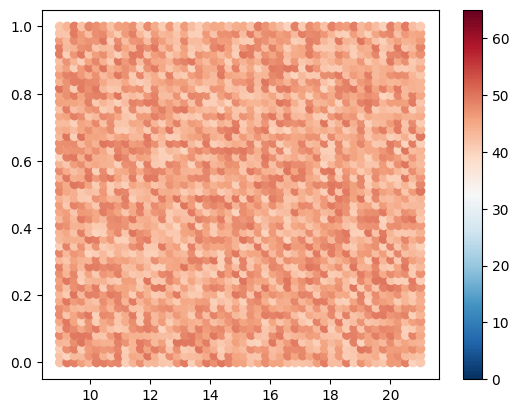

In [ ]:
predictions = computePredictions( 5, 100, 55, pts )
error_arr = error_pnts(actual, predictions)

function_plot(pts, error_arr, vmin = 0, vmax = 65 )

$y = 5x_0 + 100x_1 + 40$

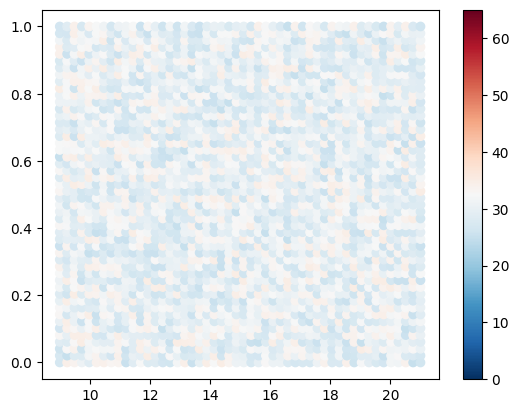

In [ ]:
predictions = computePredictions( 5, 100, 40, pts )
error_arr = error_pnts(actual, predictions)

function_plot(pts, error_arr, vmin = 0, vmax = 65 )

$y = 5x_0 + 100x_1 + 20$

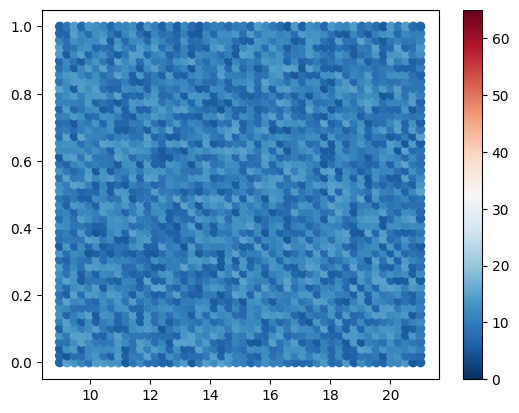

In [ ]:
predictions = computePredictions( 5, 100, 20, pts )
error_arr = error_pnts(actual, predictions)

function_plot(pts, error_arr, vmin = 0, vmax = 65 )

The less $b$ parameter we set, the less errors we get.

Scatter plot on 3 numpy arrays, _feature 1_, _feature 2_, and _error_.

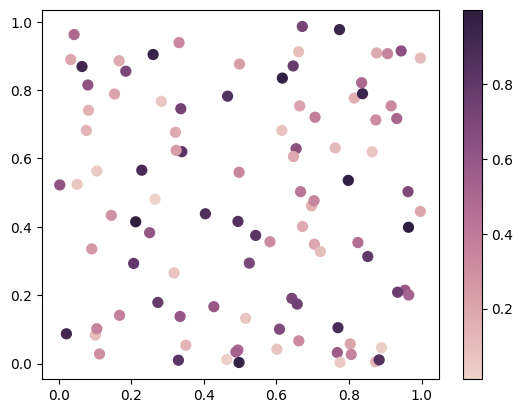

In [ ]:
# dummy numbers; in practice from the dataset
x0, x1, error = np.random.rand(3, 100)
# visualize
scatterFeatureError(x0, x1, error)

### Task

- Write a python code that picks-up the best model parameter $b$ by computing model's errors for some ranged $b$ values.
- Follow the same procedure and analysis but on different values of $m_0$.

## Stepping by The Gradient

### Symbolic Differentiation

In [ ]:
# symbolic python
from sympy import symbols, diff, sin, lambdify
# constructs symbolic expressions
x = symbols('x')

In [ ]:
diff( sin(x), x )

cos(x)

In [ ]:
# 3 x^2
diff( 3*x**2, x )

6*x

In [ ]:
# h = 2x
h = diff(x**2, x)

In [ ]:
type(h)

sympy.core.mul.Mul

In [ ]:
# cast symbolic expression as a python function
foo = lambdify(x, h)

In [ ]:
type(foo)

function

In [ ]:
# returns 2x
foo(5)

10

In [ ]:
# input. symbolic expression
# output. pythonic function of it
def pyFunc(expr):
  return lambdify(x, expr)

# input. symbolic expression
# output. pythonic funtcion of the derivative
def diffFunc(expr):
  # differentiate symbolically
  diff_expr = diff(expr, x)
  # pythonic function of the derivative
  return pyFunc(diff_expr)

In [ ]:
# foo(x) = 7
foo = diffFunc( 7*x )

In [ ]:
foo(5)

7

In [ ]:
foo(100)

7

In [ ]:
foo(33)

7

### Gradient

**Geogebra.** Visualize partial derivatives tangents of $x^2 + y^2$ function. Geogebra file in `Tutorial -> 4 - Integration by Parts -> multivariable-gradient.ggb`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# f(x,y) = x^2 + y^2
def f(x):
  return x[0]**2 + x[1]**2

In [ ]:
# f'(x,y) = 2x
# input. array x
def df_x(x):
  return 2*x[0]

# f'(x,y) = 2y
# input. array x
def df_y(x):
  return 2*x[1]

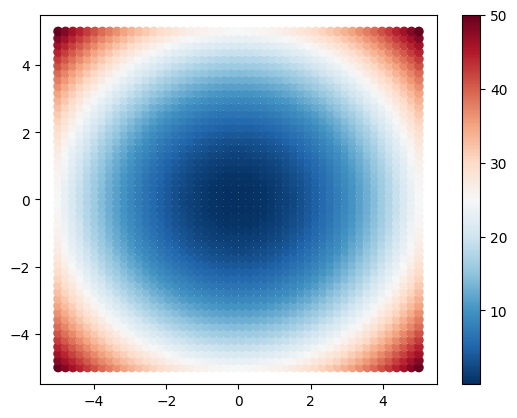

In [ ]:
# construct points, function values, and visualize
pts, f_vals = visualize_fw(f, [-5, 5], [-5, 5])

In [ ]:
# point (-2, -3)
pos = np.array([-2, -3])

In [ ]:
# x axis partial derivative at (x, y) = (-2, -3)
df_x(pos)

-4

In [ ]:
# x axis partial derivative at (x, y) = (-2, -3)
df_y(pos)

-6

In [ ]:
# point (3, 2)
pos = np.array([3, 2])

In [ ]:
# x axis partial derivative at (x, y) = (3, 2)
df_x(pos)

6

In [ ]:
# y axis partial derivative at (x, y) = (3, 2)
df_y(pos)

4

### Stepping & Learning Rate

In [ ]:
# initial position
pos

array([3, 2])

In [ ]:
# function value
f(pos)

13

In [ ]:
# x axis gradient
df_x(pos)

6

In [ ]:
# y axis gradient
df_y(pos)

4

In [ ]:
# gradient vector
grad_vec = np.array( [ df_x(pos), df_y(pos) ] )
grad_vec

array([6, 4])

In [ ]:
# descent
pos = pos + (-1)*( grad_vec )

In [ ]:
# new position
pos

array([-3, -2])

In [ ]:
# function value
f(pos)

13

Function did not get minimized!

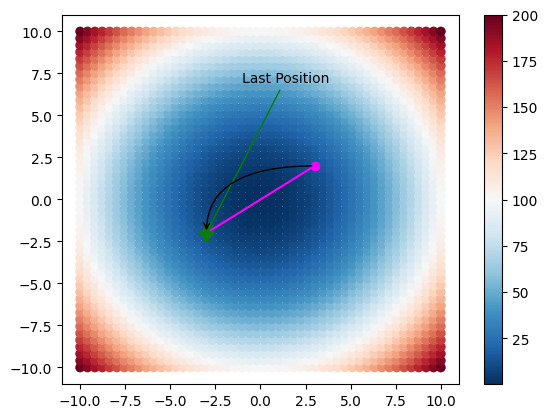

In [ ]:
visualize_learning( pts, f_vals, np.array([ [3,2], [-3,-2] ]) )

Stepping was too high. We introduce _Learning rate_.

In [ ]:
learning_rate = 0.3

In [ ]:
# initial position
pos = np.array([3, 2])
# gradient vector
grad_vec = np.array( [ df_x(pos), df_y(pos) ] )

In [ ]:
# descent
pos = pos + (-learning_rate)*grad_vec

In [ ]:
# new position
pos

array([1.2, 0.8])

In [ ]:
# function value
f(pos)

2.0800000000000005

A smaller value is discovered only with a smaller learning rate.

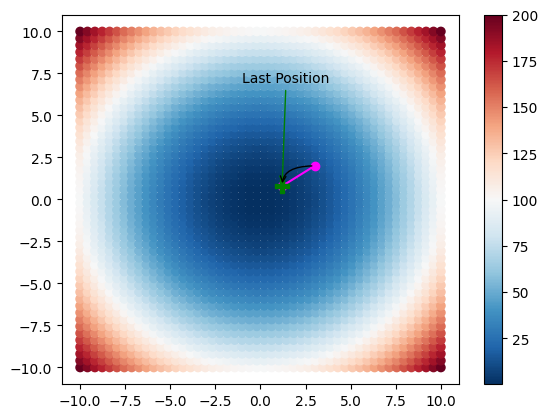

In [ ]:
visualize_learning( pts, f_vals, np.array([ [3,2], [1.2, 0.8] ]) )

### Task

- Experiment with different functions and learning rates.
- Automate this procedure by coding a function which steps the position by the gradient and halts whenever no improvement is found by a step.
- Observe whether the algorithm had reached a local or global minimum, under which learning rate, and with which function behaviour.

## Real-Estate

In [ ]:
import numpy as np
import pandas as pd

Mounting google drive and loading data

In [ ]:
# mount the drive content to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Spring 2024 - Math with Applications/MTH102 Calculus II/Project/real_estate.csv")
df

No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 8 columns]

Target value to be predicted

In [ ]:
df["Y house price of unit area"]

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [ ]:
df["Y house price of unit area"].to_numpy()

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

### Task

- Visualize a scatter plot to see whether there is a linear relationship between the target value, `Y house price of unit area` and given features. Recall the command `plt.scatter(X, Y)`.
- Select 2 features and visualize them.
- Design a 2-variable linear function with any parameters of your choice.
- Optimize the linear function's parameters to fit the data using gradient descent.
- Output the total error.

## Sampling

**Motivation**

- Analyzing a small representative data.
- Testing code on readable and known input.
- Detects over-fitting by training and testing on different subsets.
- Amplifies small datasets, and estimates a population and data variance (bootstrapping).

### Tasks

- Apply the methods on real-estate dataset.
- Generate 2-thirds 1-third splitting using numpy.
- Apply the gradient descent optimization algorithm you implemented previously, only on the first 2-thirds then test only on the last third.


#### Bonus

- Apply the bootstrap but rather than on the statistic mean, do it on training a model using gradient descent optimization algorithm.

```
- Set the number of bootstrap samples B.
- Initialize an empty list to store the models errors (like total absolute error or root mean squared error) of bootstrap samples.
- For each bootstrap sample, out of total B:
    - Generate a bootstrap sample S_b from the original sample data S by sampling with replacement.
    - Train a model on that sample and compute its error.
    - Store the model error in the list of bootstrap error list.
- Plot a histogram of those errors.
```

- Experiment and compare evaluation metrics of the bootstrap and original data.

**Lesson.** Bootstrap provides a more reliable evaluation when the dataset is small.

## Evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Engineering

In [ ]:
# input. integer x
# claim. f returns the square of given x integer
def f(x):
  return x+x

In [ ]:
# test case 1
f(2)
# 2^2 = 4
# correct

4

In [ ]:
# test case 2
f(3)
# 3^2 = 9
# false

6

**Lesson.** Good testing aims to achieve broader coverage of possibilities.

### Science

In [ ]:
X = np.arange(9, 21)

In [ ]:
# what happened in real-life or data
actual = np.array([205.38190843, 211.27780101, 228.09132574, 246.84999073,
       240.29985377, 360.69121157, 360.0336761 , 375.95614239,
       291.67050614, 304.64655008, 300.29746688, 312.35795048])

**Underfitting.** Pattern or behaviour in data we are supposed to learn from but we did not.

For example the minimum purchase value is roughly 200 but our model's predictions are around 100 ~ 150.

In [ ]:
# some linear model
def f1(x):
  return 6*x + 50

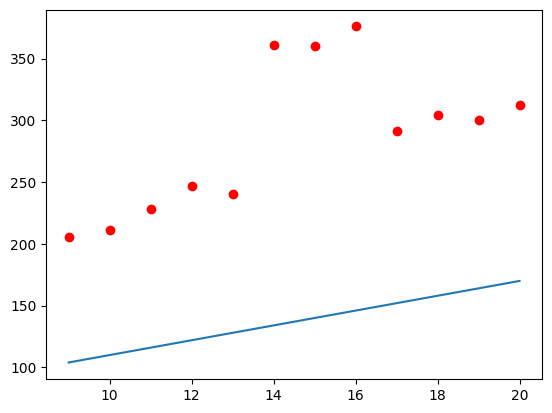

In [ ]:
# predictions, blue line
plt.plot(X, f1(X))
# actual, red scatter points
plt.scatter(X, actual, c='r')
# show both in one plot
plt.show()

**Over-fitting.** Pattern or behaviour in data we were not supposed to learn from but we did.

For example, From 2:00 PM to 4:00 PM there were offers leading to more purchase. Such factor is not in our features, and hence learning from these data is misleading for `orderHour`.

In [ ]:
# some linear model
def f1(x):
  return 6*x + 230

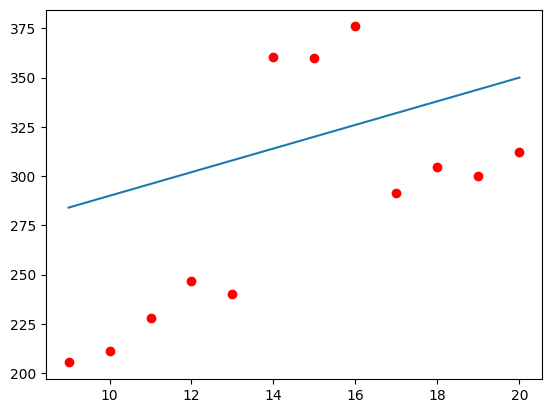

In [ ]:
# predictions, blue line
plt.plot(X, f1(X))
# actual, red scatter points
plt.scatter(X, actual, c='r')
# show both in one plot
plt.show()

**Lesson.**

- Accuracy or total model's error is not enough to conclude a model's fitness, that it did learn the right pattern.
- A good model is the one which well-generalizes beyond seen data, and limited cases.


**Math vs World**

Skiena, Data Science Manual, Page 201:

> Predictive models are structured around some **idea** of what causes future events to happen. Extrapolating from recent trends and observations assumes a world view that the future will be like the past.

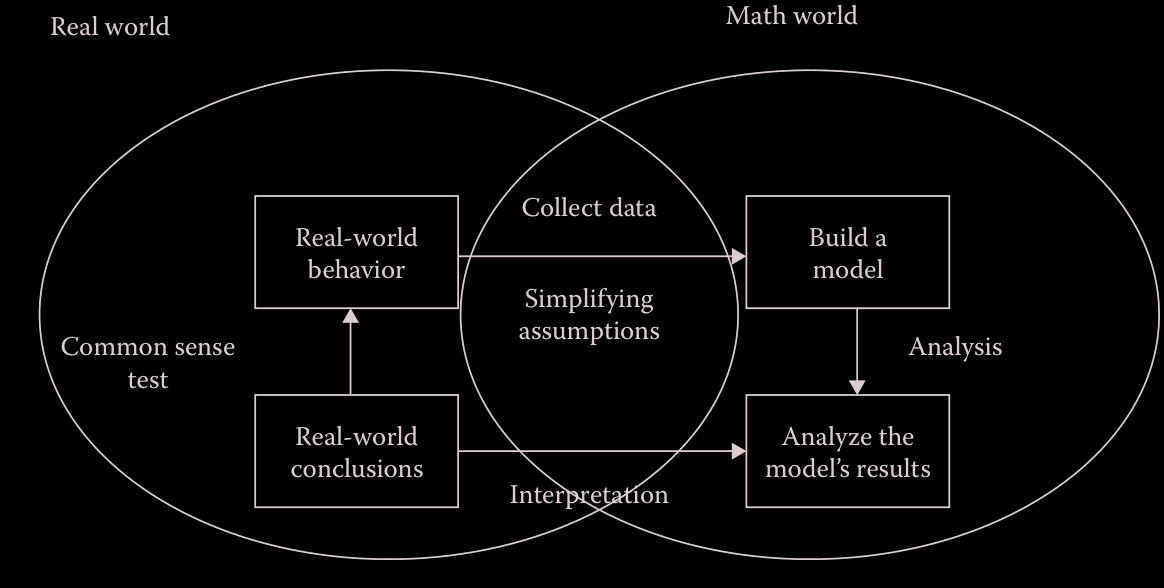

**Scientific Mehod.**

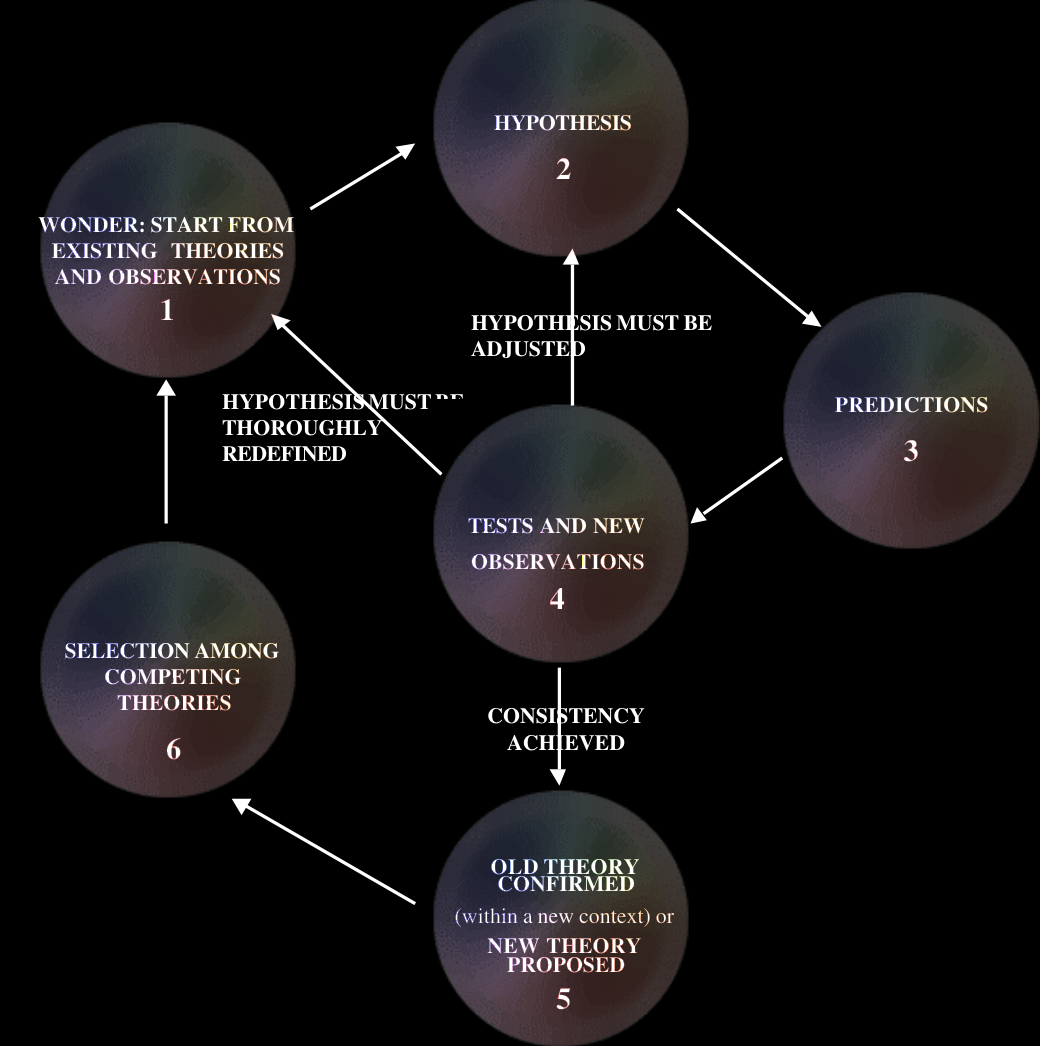

**Outliers by IQR.**

In [ ]:
# a sorted copy of actual. It does not modify in place like actual.sort()
np.sort( actual )
# 12 number

array([205.38190843, 211.27780101, 228.09132574, 240.29985377,
       246.84999073, 291.67050614, 300.29746688, 304.64655008,
       312.35795048, 360.0336761 , 360.69121157, 375.95614239])

In [ ]:
# 1/4 * 12 = 3
np.percentile(actual, 25)
# between 228 and 240, 3rd and 4th

237.2477217625

In [ ]:
# 3/4 * 12 = 9
np.percentile(actual, 75)
# between 312 and 360, 9th and 10th

324.27688188499997

In [ ]:
# set percentiles
Q1 = np.percentile( actual, 25)
Q3 = np.percentile( actual, 75)
IQR = Q3 - Q1
IQR

87.02916012249997

In [ ]:
# boolean masking outliers of high value
actual > Q3

array([False, False, False, False, False,  True,  True,  True, False,
       False, False, False])

In [ ]:
# boolean masking outliers of low value
actual < Q1

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# boolean masking of values within Q1 and Q3
boolMask = (actual >= Q1 ) & ( actual <= Q3 )
boolMask

array([False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True])

In [ ]:
# points remaining
actual[boolMask]

array([246.84999073, 240.29985377, 291.67050614, 304.64655008,
       300.29746688, 312.35795048])

In [ ]:
X

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [ ]:
actual

array([205.38190843, 211.27780101, 228.09132574, 246.84999073,
       240.29985377, 360.69121157, 360.0336761 , 375.95614239,
       291.67050614, 304.64655008, 300.29746688, 312.35795048])

In [ ]:
np.array(
    [[9, 205.38190843],
 [10, 211.27780101],
 [11, 228.09132574],
 [12, 246.84999073],
 [13, 240.29985377],
 [14, 360.69121157],
 [15, 360.0336761],
 [16, 375.95614239],
 [17, 291.67050614],
 [18, 304.64655008],
 [19, 300.29746688],
 [20, 312.35795048]]
)

array([[  9.        , 205.38190843],
       [ 10.        , 211.27780101],
       [ 11.        , 228.09132574],
       [ 12.        , 246.84999073],
       [ 13.        , 240.29985377],
       [ 14.        , 360.69121157],
       [ 15.        , 360.0336761 ],
       [ 16.        , 375.95614239],
       [ 17.        , 291.67050614],
       [ 18.        , 304.64655008],
       [ 19.        , 300.29746688],
       [ 20.        , 312.35795048]])

### Business Value Proposition

- _Problem_. Some clients are defaulting, losing my business money.
- _Technical Approach_. Predicting defaulting loans.
- _Added Value_. Enabling the organization to act beforehand.
- _Metrics_. Percentage of predicted defaulters.
- _Acceptance Threshold_. Covering at least 70%.

What if a bank's defaulters constitute 0.01% of client base, i.e only 1 out of 10k clients default. Then good technical solutions are worthless!

**Lesson.** Technical solutions does not necessarily captivate a stake-holder's interest. Learn more from [AI Product Management](https://www.coursera.org/specializations/ai-product-management-duke).

### Tasks

- Read [Scientific Methods in Computer Science](https://john.cs.olemiss.edu/~hcc/researchMethods/2016spr/notes/localcopy/cs_method.pdf) paper.
- Do you see the new `actual` array better than the original one? Why?
- Use `boolMask = (actual >= (Q1 - a*IQR) ) & ( actual <= (Q3 + b*IQR) )` with parameters `a` and `b` which conforms to your intuition from the picture.
- Where do you see outliers in the following graph:

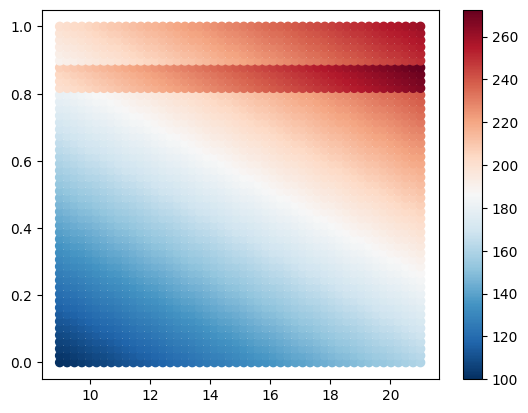

- Try using a boolean mask on a 2d numpy array. For example `np.array([1,2],[3,4])` with `boolMask = np.array([True, False])`.